# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [7]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
pip install --upgrade jupyter

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade ipywidgets


  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/b8/d4/ce436660098b2f456e2b8fdf76d4f33cbc3766c874c4aa2f772c7a5e943f/ipywidgets-8.1.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.0.7
    Uninstalling ipywidgets-8.0.7:
      Successfully uninstalled ipywidgets-8.0.7
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip show numpy  # Find installation direectory

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages
Requires: 
Required-by: bokeh, captum, contourpy, gym, hdijupyterutils, imageio, matplotlib, numba, onnx, opencv-python, pandas, patsy, pyarrow, sagemaker, sagemaker-pyspark, scikit-learn, scipy, seaborn, shap, smclarify, sparkmagic, statsmodels, torchtext, torchvision


In [4]:
# updata the path to include user installation directory
import os
new_path = '/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages'
os.environ['PATH'] = f"{os.environ['PATH']}:{new_path}"

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [8]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image
])

# Create training set and define training dataloader
## YOUR CODE HERE ##

training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64)

100%|██████████| 9912422/9912422 [00:00<00:00, 135809309.17it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 46252651.33it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 294895590.85it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13192886.96it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [16]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


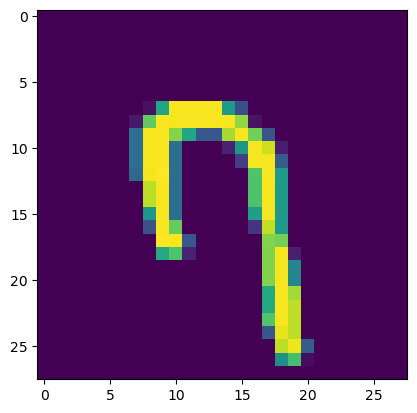

9


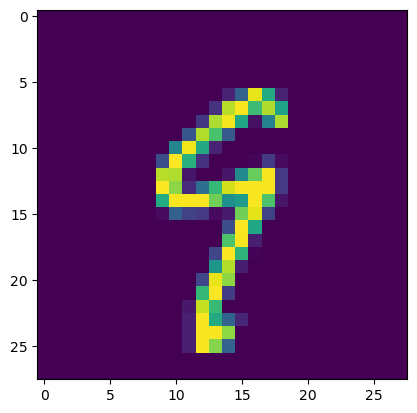

2


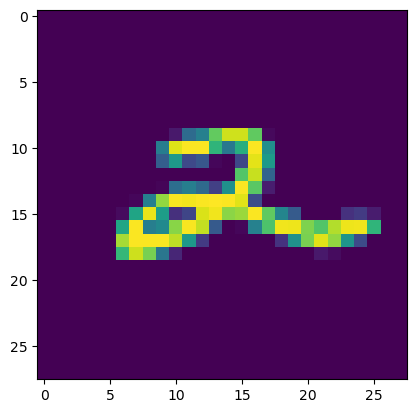

3


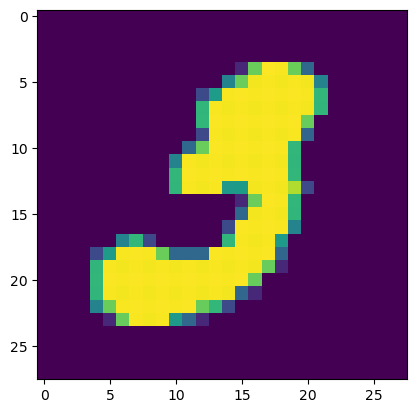

1


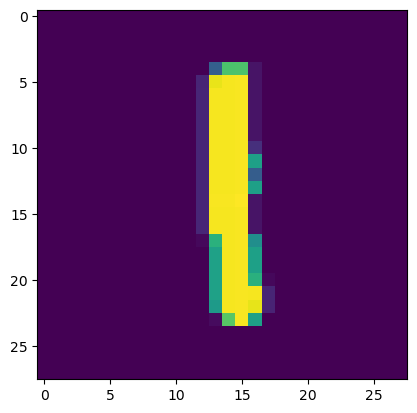

In [17]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

Image Shape:  torch.Size([64, 1, 28, 28])
Label Shape:  torch.Size([64])


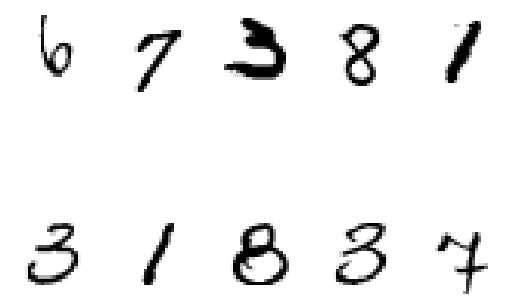

In [19]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print('Image Shape: ', images.shape)
print('Label Shape: ',labels.shape)

figure = plt.figure()
num_of_images = 10
for index in range(1, (num_of_images + 1)):
    plt.subplot(2, 5, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [29]:
## YOUR CODE HERE ##
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Create an instance of the neural network
model = NeuralNetwork()
print(model)
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [30]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [33]:
epochs = 250
steps = 0
train_loss = 0
print_every = 10

train_loss_history = list()
valid_loss_history = list()

for epoch in range(epochs):
    for images, labels in train_loader:
        steps += 1

        images, labels = images.to(device), labels.to(device)
        images.requires_grad = True

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        train_loss_history.append(train_loss/len(train_loader))

        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for images, labels in test_loader:
                    images, labels = images.to(device), labels.to(device)
                    images.requires_grad = True

                    logits = model(images)
                    batch_loss = criterion(logits, labels)
                    valid_loss += batch_loss.item()

                    valid_loss_history.append(valid_loss/len(test_loader))

                    # Calculate accuracy
                    probs = torch.exp(logits)
                    _, top_class = probs.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Training Loss: {train_loss/print_every:.3f}.. "
                  f"Validation Loss: {valid_loss/len(test_loader):.3f}.. "
                  f"Accuracy: {accuracy/len(test_loader):.3f}")
            train_loss = 0
            model.train()


Epoch 1/250.. Training Loss: 0.493.. Validation Loss: 0.462.. Accuracy: 0.872
Epoch 1/250.. Training Loss: 0.490.. Validation Loss: 0.495.. Accuracy: 0.850
Epoch 1/250.. Training Loss: 0.439.. Validation Loss: 0.411.. Accuracy: 0.882
Epoch 1/250.. Training Loss: 0.405.. Validation Loss: 0.416.. Accuracy: 0.882
Epoch 1/250.. Training Loss: 0.434.. Validation Loss: 0.407.. Accuracy: 0.879
Epoch 1/250.. Training Loss: 0.453.. Validation Loss: 0.430.. Accuracy: 0.880
Epoch 1/250.. Training Loss: 0.497.. Validation Loss: 0.401.. Accuracy: 0.880
Epoch 1/250.. Training Loss: 0.383.. Validation Loss: 0.440.. Accuracy: 0.869
Epoch 1/250.. Training Loss: 0.470.. Validation Loss: 0.399.. Accuracy: 0.880
Epoch 1/250.. Training Loss: 0.452.. Validation Loss: 0.416.. Accuracy: 0.879
Epoch 1/250.. Training Loss: 0.438.. Validation Loss: 0.384.. Accuracy: 0.889
Epoch 1/250.. Training Loss: 0.416.. Validation Loss: 0.387.. Accuracy: 0.886
Epoch 1/250.. Training Loss: 0.343.. Validation Loss: 0.362.. Ac

KeyboardInterrupt: 

Plot the training loss (and validation loss/accuracy, if recorded).

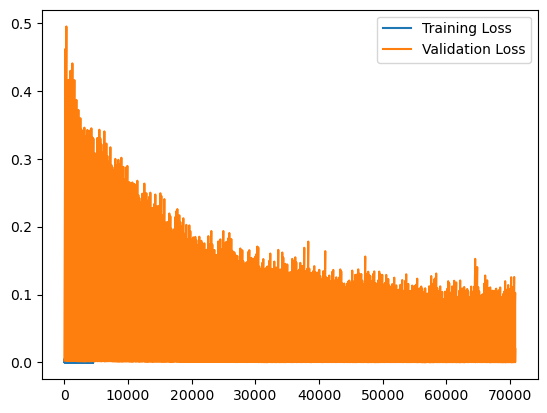

In [34]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(valid_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [35]:
## YOUR CODE HERE ##
test_loss = 0
accuracy = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images.requires_grad = True

        logits = model(images)
        batch_loss = criterion(logits, labels)

        test_loss += batch_loss.item()

        # Calculate accuracy
        probs = torch.exp(logits)
        _, top_class = probs.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test accuracy: {accuracy/len(test_loader):.5f}")



Test accuracy: 0.96785


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [36]:
## YOUR CODE HERE ##
learning_rate = 0.01
momentum = 0.5

optimizer = optim.SGD(
    model.parameters(),
    lr=learning_rate,
    momentum=momentum,
    weight_decay=0.0005
    )

epochs = 250
steps = 0
train_loss = 0
print_every = 10

train_loss_history = list()
valid_loss_history = list()

for epoch in range(epochs):
    for images, labels in train_loader:
        steps += 1

        images, labels = images.to(device), labels.to(device)
        images.requires_grad = True

        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        train_loss_history.append(train_loss/len(train_loader))

        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for images, labels in test_loader:
                    images, labels = images.to(device), labels.to(device)
                    images.requires_grad = True

                    logits = model(images)
                    batch_loss = criterion(logits, labels)
                    valid_loss += batch_loss.item()

                    valid_loss_history.append(valid_loss/len(test_loader))

                    # Calculate accuracy
                    probs = torch.exp(logits)
                    _, top_class = probs.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Training Loss: {train_loss/print_every:.3f}.. "
                  f"Validation Loss: {valid_loss/len(test_loader):.3f}.. "
                  f"Accuracy: {accuracy/len(test_loader):.3f}")
            train_loss = 0
            model.train()

            

Epoch 1/250.. Training Loss: 0.090.. Validation Loss: 0.094.. Accuracy: 0.971
Epoch 1/250.. Training Loss: 0.069.. Validation Loss: 0.089.. Accuracy: 0.972
Epoch 1/250.. Training Loss: 0.078.. Validation Loss: 0.089.. Accuracy: 0.973
Epoch 1/250.. Training Loss: 0.065.. Validation Loss: 0.089.. Accuracy: 0.972
Epoch 1/250.. Training Loss: 0.060.. Validation Loss: 0.089.. Accuracy: 0.971
Epoch 1/250.. Training Loss: 0.063.. Validation Loss: 0.085.. Accuracy: 0.974
Epoch 1/250.. Training Loss: 0.070.. Validation Loss: 0.085.. Accuracy: 0.973
Epoch 1/250.. Training Loss: 0.038.. Validation Loss: 0.084.. Accuracy: 0.973
Epoch 1/250.. Training Loss: 0.063.. Validation Loss: 0.082.. Accuracy: 0.974
Epoch 1/250.. Training Loss: 0.066.. Validation Loss: 0.085.. Accuracy: 0.973
Epoch 1/250.. Training Loss: 0.042.. Validation Loss: 0.084.. Accuracy: 0.974
Epoch 1/250.. Training Loss: 0.072.. Validation Loss: 0.081.. Accuracy: 0.974
Epoch 1/250.. Training Loss: 0.073.. Validation Loss: 0.082.. Ac

KeyboardInterrupt: 

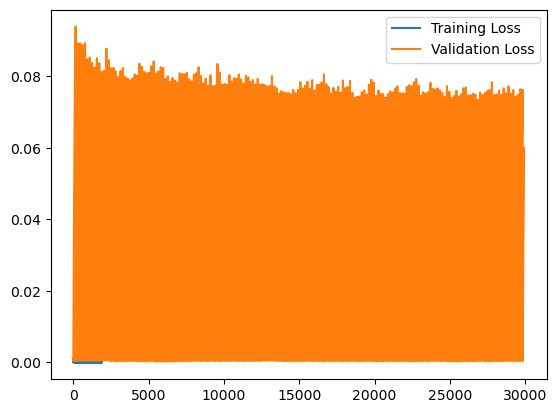

In [37]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(valid_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [38]:
test_loss = 0
accuracy = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        images.requires_grad = True

        logits = model(images)
        batch_loss = criterion(logits, labels)

        test_loss += batch_loss.item()

        # Calculate accuracy
        probs = torch.exp(logits)
        _, top_class = probs.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test accuracy: {accuracy/len(test_loader):.3f}")

Test accuracy: 0.975


## Saving your model
Using `torch.save`, save your model for future loading.

In [39]:
## YOUR CODE HERE ##
torch.save(model,'final_model')